#### Oppgave 1

##### På kort sikt har bedriften tilgang til begrenset kapital K=10. Prisen per enhet kapital er fast r=500 NOK, mens én time med arbeidskraft koster w = 350 NOK. På kort sikt kan bedriften velge hvor mange timer arbeidskraft som tilsettes. Bedriften leier et bygg til produksjonen av produktet, og dette koster 10 000 NOK (faste kostnader).

##### x=f(N,K)=N^0.5*K^0.5

#### A)
##### Finn et utrykk for bedriftens totale produksjonskostnad på kort sikt som en funksjon av produsert mengde og kapitalbeholdningen: C(x,K), Tegn denne funksjon i en figur med produksjon på den horisontale aksen. Tegn også kostnadsfunksjonen som oppstår når kapitalbeholdningen økes til K = 50. Kommenter dine funn.

In [40]:
# importerer pakker jeg skal bruke
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

# definerer ulike symboler og lager funksjon
K,N,w,r,x = sp.symbols('K N w r x', positive=True, real=True)
eq = sp.Eq(N**0.5*K**0.5, x)
eq1 = sp.solve(eq, N)[0]

eq2 = sp.lambdify(
    (x, K), eq1)

eq1

x**2/K

In [41]:
# definerer funksjonen vi skal bruke
def fun (x, K):
 return 350*eq2(x,K) + 500*K + 10000

fun(eq1,K)

500*K + 10000 + 350*x**4/K**3

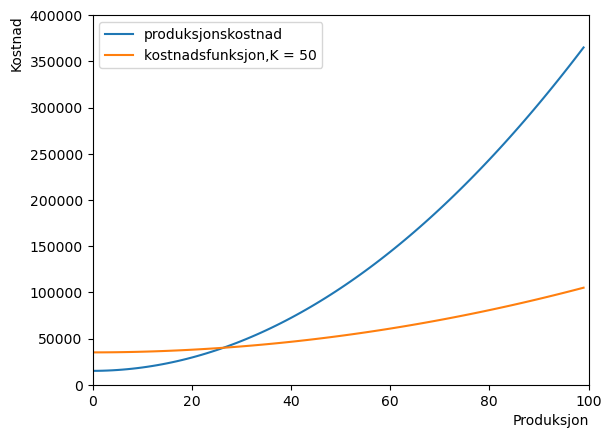

In [75]:
# setter restriksjoner for grafen
lp=np.linspace(0.1,100,100)

# lager grafen
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Kostnad', loc='top')
                ax.set_xlabel('Produksjon', loc='right')
                ax.set(xlim=(0,100))
                ax.set(ylim=(0,400000))
                ax.spines['top']
                ax.spines['right']
                
                return fig, ax

fig, ax = create_ax()

# plotter linjene
ax.plot(fun(lp, 10), label='produksjonskostnad')
ax.plot(fun(lp, 50), label="kostnadsfunksjon,K = 50")

# legend
ax.legend();

#### B)
##### I en ny figur tegn totale gjennomsnittskostnader på kort sikt, variabler gjennomsnittskostnader på kort sikt, og grensekostnaden på kort sikt. Kommenter og forklar forholdet mellom total og variabel gjennomsnittskostnad og grensekostnaden.

In [80]:
#Oppgave B

# definerer total gjennomsnittskostnad og variabler gjennomsnittskostnad
def fung (x, K):
    return fun(x, K)/x

def fungu (x, K):
    return (fun(x, K)-10000)/x

# grensekostnad
gk1 = sp.diff(fun(x, K), x)

gk2 = sp.lambdify(
    (x, K), gk1)

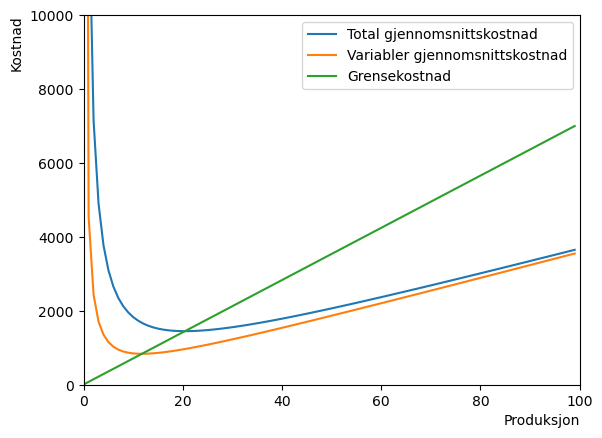

In [81]:
# lager graf
fig2, ax = create_ax()

# setter x og y akse lim
ax.set(xlim=(0,100))
ax.set(ylim=(0,10000))

# plotter linjene
ax.plot(fung(lp, 10), label="Total gjennomsnittskostnad")
ax.plot(fungu(lp, 10), label="Variabler gjennomsnittskostnad")
ax.plot(gk2(lp, 10), label="Grensekostnad")

# legend
ax.legend();




##### Grensekostnaden skjærer gjennom total gjennomsnittskostnad og variabler gjennomsnittskostnad, dette betyr at gjennomsnittskostnadene på sitt laveste punkt. 

#### EKSEMPEL FRA OPPGAVETEKSTEN:

In [ ]:
# importer pakker

import sympy as sp

In [ ]:
# definer symboler. X blir produksjonsmålet, lmda er Lagrange multiplikatoren
N,K,X,lmda,w,r=sp.symbols('N K X \lambda, w, r', real=True, positive=True)

In [ ]:
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

In [ ]:
# Lagrange likning
L=w*N + r*K-lmda*(x(N,K)-X)

In [ ]:
# deriver mhp N og K

dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)
display (foc_N)
display (foc_K)

Eq(-0.5*K**0.5*\lambda/N**0.5 + w, 0)

Eq(-0.5*N**0.5*\lambda/K**0.5 + r, 0)

In [ ]:
display (dL_N.args)
display (dL_K.args)
# dette viser plasseringen av elementene i listene

(w, -0.5*K**0.5*\lambda/N**0.5)

(r, -0.5*N**0.5*\lambda/K**0.5)

In [ ]:
# da kan vi skrive den rel prisen på arbeidskraft (w/r) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

# sett disse lik som i likning (7)
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, 1.0*K**1.0/N**1.0)

### OPPGAVE 2

##### Hvorfor er det relative forholdet mellom K og N i en optimal løsning kun avhengig av økonomiske faktorer her, og ikke produksjonselastisitetene (dvs faktorer fra produktfunksjonen)? Undersøk din løsning ved å kjøre samme analyse som ovenfor med en generell Cobb-Douglas produktfunksjon x=Nâ*K^b, hvor a,b>0 er produksjonselastisitetene til arbeidskraft og kapital.

In [83]:
# definerer symboler
a, b=sp.symbols('a, b', positive=True, real=True)

In [88]:
def x1 (N,K):
    return N**a*K**b
x1(N,K)

K**b*N**a

In [89]:
# Lagrange likning
L=w*N + r*K-lmda*(x1(N,K)-X)

In [90]:
dL_N=sp.diff(L,N)
dL_K=sp.diff(L,K)
foc_N=sp.Eq(dL_N,0)
foc_K=sp.Eq(dL_K,0)
display (foc_N)
display (foc_K)

Eq(-K**b*N**a*\lambda*a/N + w, 0)

Eq(r - K**b*N**a*\lambda*b/K, 0)

In [91]:
# da kan vi skrive den rel prisen på arbeidskraft (w/r) som
rel_w=(dL_N.args[0]/dL_K.args[0])

# og mtsb som
mtsb=(dL_N.args[1]/dL_K.args[1])

# sett disse lik som i likning (7)
optimal=sp.Eq(rel_w,mtsb)
display(optimal)

Eq(w/r, K*a/(N*b))